# Importando Bibliotecas 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Lendo Arquivo CSV

In [3]:
df = pd.read_csv('../Dados/dados.csv')

In [4]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


Pesquisa Nacional por Amostra de Domicílios - 2015
A Pesquisa Nacional por Amostra de Domicílios - PNAD investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

In [5]:
UF = {'11': 'Rondônia',
     '12': 'Acre',
     '13': 'Amazonas',
     '14': 'Roraima',
     '15': 'Pará',
     '16': 'Amapá',
     '17': 'Tocantins',
     '21': 'Maranhão',
     '22': 'Piauí',
     '23': 'Ceará',
     '24': 'Rio Grande do Norte',
     '25': 'Paraíba',
     '26': 'Pernambuco',
     '27': 'Alagoas',
     '28': 'Sergipe',
     '29': 'Bahia',
     '31': 'Minas Gerais',
     '32': 'Espírito Santo',
     '33': 'Rio de Janeiro',
     '35': 'São Paulo',
     '41': 'Parana',
     '42': 'Santa Cartarina',
     '43': 'Rio Grande do Sul',
     '50': 'Mato Grosso do Sul',
     '51': 'Mato Grosso',
     '52': 'Goiás',
     '53': 'Distrito Federal'}

In [6]:
Sexo = {'0': 'Masculino',
       '1': 'Feminino'}

In [7]:
Cor = {'0':'Indigena',
      '2':'Branca',
      '4':'Preta',
      '6':'Amarela',
      '8':'Parda',
      '9':'Sem declaração'}

In [8]:
df['UF'] = df['UF'].apply(str)
df['Sexo'] = df['Sexo'].apply(str)
df['Cor'] = df['Cor'].apply(str)

In [9]:
df['UF'].dtypes

dtype('O')

In [10]:
df['UF'] = df['UF'].map(UF)
df['Sexo'] = df['Sexo'].map(Sexo)
df['Cor'] = df['Cor'].map(Cor)

In [11]:
df.isna().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

In [12]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,12,800,1.603808
1,Rondônia,Feminino,23,Branca,12,1150,1.739790
2,Rondônia,Feminino,35,Parda,15,880,1.760444
3,Rondônia,Masculino,46,Branca,6,3500,1.783158
4,Rondônia,Feminino,47,Parda,9,150,1.690631


In [13]:

filtro_renda = df[df['Renda']<=10000]
filtro_renda_bp = df[df['Renda']<=5000]

# Funções 

In [14]:
def porcentagem_populacao(dataframe,q1,q3):
    filtro = [dataframe['Renda']>= q1] and [dataframe['Renda'] <= q3]
    filtro_df = dataframe[filtro[0]]
    return filtro_df.shape[0]/dataframe.shape[0]

# Cálculos estatístico da Renda de toda população brasileira

###  Fazer uma função que que recebe uma banco de dados e um intervalo de renda e retorna a porcentagem da população

In [15]:
renda_media_total = df['Renda'].mean()
renda_media_total

2000.3831988547631

In [16]:
renda_mediana_total = df['Renda'].median()
renda_mediana_total

1200.0

In [17]:
q1, _, q3 = df['Renda'].quantile([0.25, 0.5, 0.75])
q1

788.0

In [18]:
renda_maxima = df['Renda'].max()
renda_maxima


200000

In [19]:
renda_minima = df['Renda'].min()
renda_minima

0

In [20]:
print('{:.2f} % da população brasileira vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df,q1,q3) *100, q1,q3))

76.10 % da população brasileira vive com um salario entre R$788.00 e R$2000.00


## Histogramas 

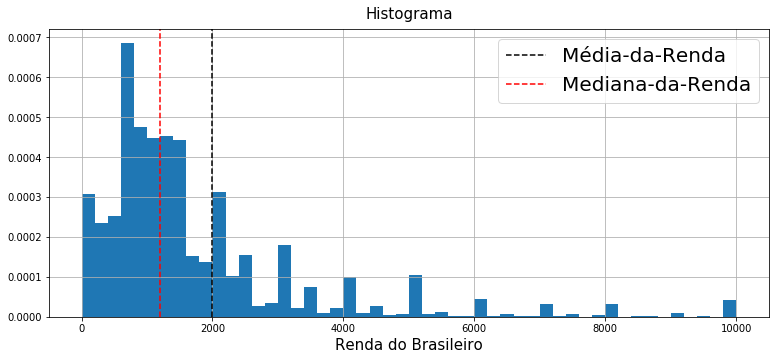

In [21]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_renda['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda do Brasileiro', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_total, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_total, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)


fig.savefig('../Dados/imagens/histograma_renda.png', bbox_inches='tight')

## BoxPlot

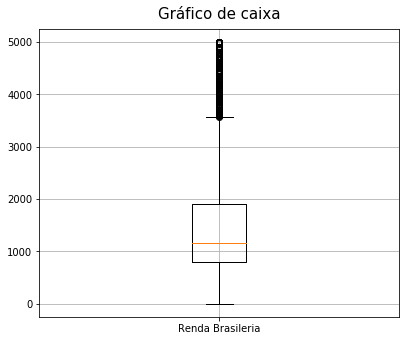

In [22]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_renda_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda Brasileria'])
eixo.grid(True)

fig.savefig('../Dados/imagens/boxpot_renda.png', bbox_inches='tight')

# Cálculo estatisco da população parda brasileira 

In [23]:
pardos = df['Cor'] == 'Parda'

In [24]:
df_pardos = df[pardos]
df_pardos.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,12,800,1.603808
2,Rondônia,Feminino,35,Parda,15,880,1.760444
4,Rondônia,Feminino,47,Parda,9,150,1.690631
5,Rondônia,Feminino,34,Parda,12,790,1.637906
6,Rondônia,Masculino,57,Parda,12,3150,1.570078


In [25]:
filtro_pardos = df_pardos[df_pardos['Renda'] <= 10000]
filtro_pardos_bp = df_pardos[df_pardos['Renda'] <= 5000]

In [26]:
renda_media_pardos = df_pardos['Renda'].mean()
renda_media_pardos

1513.596102992345

In [27]:
renda_mediana_pardos = df_pardos['Renda'].median()
renda_mediana_pardos

1000.0

In [28]:
q1,_,q3 = df_pardos['Renda'].quantile([0.25, 0.5, 0.75])

In [29]:
print('{:.2f} % da parda vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_pardos,q1,q3) *100, q1,q3))

75.26 % da parda vive com um salario entre R$750.00 e R$1600.00


In [30]:
maximo_pardos = df_pardos['Renda'].max()
maximo_pardos

100000

In [31]:
minimo_pardos = df_pardos['Renda'].min()
minimo_pardos

0

## Exportando csv

In [32]:
df_pardos_tratado = df_pardos.drop(['Cor','Altura'], axis=1)
df_pardos_tratado.to_csv('../Dados/dados_pardos.csv',index=False)


   # Histograma 

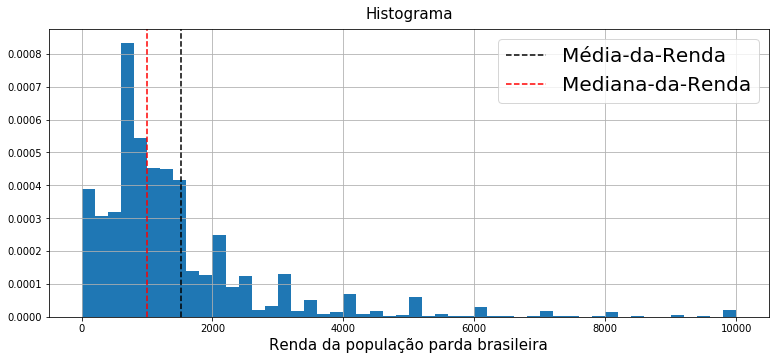

In [33]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_pardos['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda da população parda brasileira', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_pardos, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_pardos, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

fig.savefig('../Dados/imagens/histograma_renda_pardos.png', bbox_inches='tight')

 ## BoxPlot

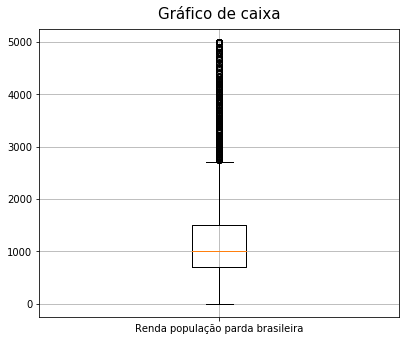

In [34]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_pardos_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população parda brasileira'])
eixo.grid(True)

fig.savefig('../Dados/imagens/boxplot_renda_pardos.png', bbox_inches='tight')

# Cálculo estatístico da população branca brasileira

In [35]:
df_brancos = df[df['Cor'] == 'Branca']
df_brancos.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
1,Rondônia,Feminino,23,Branca,12,1150,1.739790
3,Rondônia,Masculino,46,Branca,6,3500,1.783158
12,Rondônia,Feminino,52,Branca,6,1200,1.736442
14,Rondônia,Masculino,45,Branca,12,2000,1.780450
15,Rondônia,Masculino,34,Branca,16,6000,1.711825


In [36]:
filtro_branco = df_brancos[df_brancos['Renda'] <=10000]
filtro_branco_bp = df_brancos[df_brancos['Renda'] <=5000]

In [37]:
renda_media_branca = df_brancos['Renda'].mean()
renda_media_branca

2679.019330504479

In [38]:
renda_mediana_branca = df_brancos['Renda'].median()
renda_mediana_branca

1500.0

In [39]:
q1,_,q3 = df_brancos['Renda'].quantile([0.25,0.5,0.75])

In [40]:
print('{:.2f} % da população branca vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_brancos,q1,q3) *100, q1,q3))

78.93 % da população branca vive com um salario entre R$908.00 e R$3000.00


In [41]:
maximo_branco = df_brancos['Renda'].max()
maximo_branco

200000

In [42]:
minimo_branco = df_brancos['Renda'].min()
minimo_branco

0

## Exportando csv

In [43]:
df_brancos_tratado = df_brancos.drop(['Cor','Altura'], axis=1)
df_brancos_tratado.to_csv('../Dados/dados_brancos.csv',index=False)

## Histograma

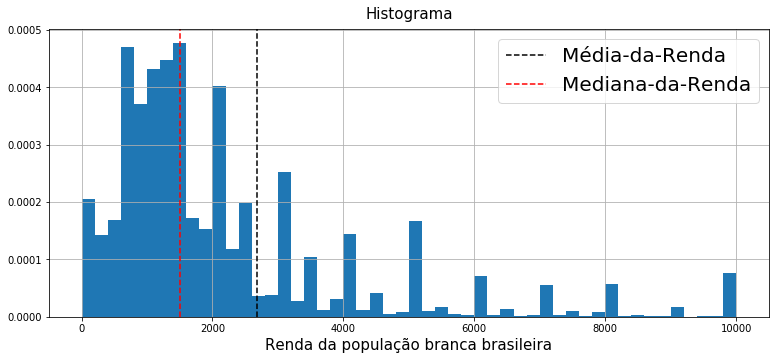

In [44]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_branco['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda da população branca brasileira', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_branca, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_branca, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

fig.savefig('../Dados/imagens/histograma_renda_brancos.png', bbox_inches='tight')

## BoxPlot 

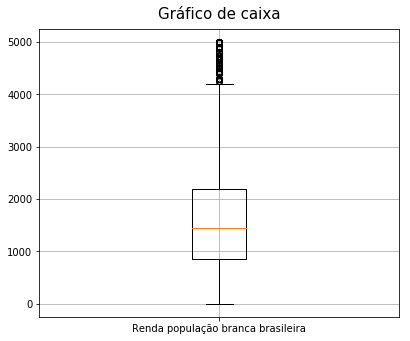

In [45]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_branco_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população branca brasileira'])
eixo.grid(True)

fig.savefig('../Dados/imagens/boxplot_renda_brancos.png', bbox_inches='tight')

### OBS: Esses dados são auto declarados. Eu acredito que ocorra uma sobreposição entre as declarações.   

# Cálculo estatístico da população indigena brasileira

In [46]:
df_indigena = df[df['Cor'] == 'Indigena']
df_indigena.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
659,Rondônia,Masculino,53,Indigena,16,5000,1.795227
901,Rondônia,Feminino,40,Indigena,4,900,1.662915
909,Rondônia,Masculino,40,Indigena,12,2500,1.536050
1601,Acre,Feminino,54,Indigena,1,0,1.611601
1790,Acre,Masculino,72,Indigena,1,300,1.626542


In [47]:
filtro_indigena = df_indigena[df_indigena['Renda'] <= 10000]
filtro_indigena_bp = df_indigena[df_indigena['Renda'] <= 5000]

In [48]:
renda_media_indigena = df_indigena['Renda'].mean()
renda_media_indigena

1472.8879551820728

In [49]:
renda_mediana_indigena = df_indigena['Renda'].median()
renda_mediana_indigena

788.0

In [50]:
q1,_,q3=df_indigena['Renda'].quantile([0.25,0.5,0.75])

In [51]:
print('{:.2f} % da população indigena vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_indigena,q1,q3) *100, q1,q3))

76.19 % da população indigena vive com um salario entre R$300.00 e R$1400.00


In [52]:
maximo_indigena = df_indigena['Renda'].max()
maximo_indigena

120000

In [53]:
minimo_indigena = df_indigena['Renda'].min()
minimo_indigena

0

## Exportando csv

In [54]:
df_indigena_tratado = df_indigena.drop(['Cor','Altura'], axis=1)
df_indigena_tratado.to_csv('../Dados/dados_indigena.csv',index=False)

## Histograma

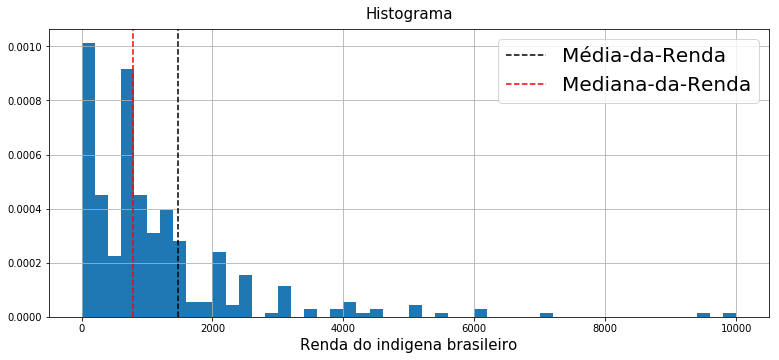

In [55]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_indigena['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda do indigena brasileiro', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_indigena, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_indigena, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

fig.savefig('../Dados/imagens/histograma_renda_indigena.png', bbox_inches='tight')

## BoxPlot 

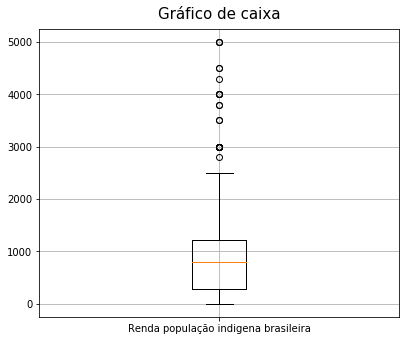

In [56]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_indigena_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população indigena brasileira'])
eixo.grid(True)

fig.savefig('../Dados/imagens/boxplot_renda_indinega.png', bbox_inches='tight')

# Cálculo estatístico da população preta brasileira 

In [57]:
df_preta = df[df['Cor'] == 'Preta']
df_preta.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
8,Rondônia,Feminino,50,Preta,14,1800,1.780329
39,Rondônia,Masculino,47,Preta,9,1500,1.672258
64,Rondônia,Feminino,36,Preta,12,1000,1.704955
66,Rondônia,Masculino,49,Preta,10,1000,1.810540
67,Rondônia,Feminino,44,Preta,10,800,1.741427


In [58]:
filtro_preta = df_preta[df_preta['Renda'] <= 10000]
filtro_preta_bp = df_preta[df_preta['Renda'] <= 5000]

In [59]:
renda_media_preta = df_preta['Renda'].mean()
renda_media_preta

1442.2948397092123

In [60]:
renda_mediana_preta = df_preta['Renda'].median()
renda_mediana_preta

1000.0

In [61]:
q1,_,q3 = df_preta['Renda'].quantile([0.25,0.5,0.75])

In [62]:
print('{:.2f} % da população preta vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_preta,q1,q3) *100, q1,q3))

76.38 % da população preta vive com um salario entre R$788.00 e R$1600.00


In [63]:
maximo_preta = df_preta['Renda'].max()
maximo_preta

50000

In [64]:
minimo_preta = df_preta['Renda'].min()
minimo_preta

0

## Exportando Dados 

In [65]:
df_preta_tratado = df_preta.drop(['Cor','Altura'], axis=1)
df_preta_tratado.to_csv('../Dados/dados_preta.csv',index=False)

 ## Histograma

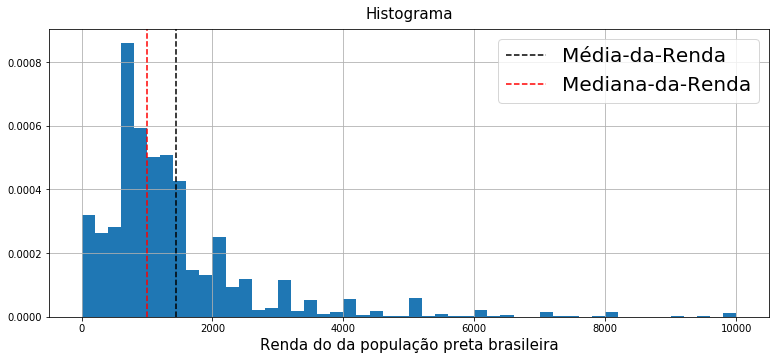

In [66]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_preta['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda do da população preta brasileira', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_preta, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_preta, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

fig.savefig('../Dados/imagens/histograma_renda_preta.png', bbox_inches='tight')

## Boxplot 

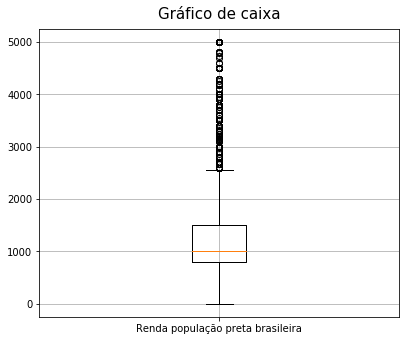

In [67]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_preta_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população preta brasileira'])
eixo.grid(True)

fig.savefig('../Dados/imagens/boxplot_renda_preta.png', bbox_inches='tight')

## Cálculo estatístico da população amarela brasileira 

In [68]:
df_amarela = df[df['Cor'] == 'Amarela']
df_amarela.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
35,Rondônia,Masculino,64,Amarela,5,600,1.712122
119,Rondônia,Masculino,53,Amarela,8,1800,1.608399
209,Rondônia,Masculino,34,Amarela,16,8000,1.649053
1128,Rondônia,Feminino,45,Amarela,5,640,1.661402
1133,Rondônia,Masculino,33,Amarela,5,1250,1.710920


In [69]:
filtro_amarela = df_amarela[df_amarela['Renda'] <= 10000 ]
filtro_amarela_bp = df_amarela[df_amarela['Renda'] <= 5000]

In [70]:
renda_media_amarela = df_amarela['Renda'].mean()
renda_media_amarela

4182.920454545455

In [71]:
renda_mediana_amarela = df_amarela['Renda'].median()
renda_mediana_amarela

2450.0

In [72]:
q1,_,q3 = df_amarela['Renda'].quantile([0.25,0.5,0.75])

In [73]:
print('{:.2f} % da população amarela vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_amarela,q1,q3) *100, q1,q3))

78.12 % da população amarela vive com um salario entre R$1200.00 e R$5000.00


In [74]:
maximo_amarela = df_amarela['Renda'].max()
maximo_amarela

50000

In [75]:
minimo_amarela = df_amarela['Renda'].min()
minimo_amarela

0

## Exportando dados csv 

In [76]:
df_amarela_tratado = df_amarela.drop(['Cor','Altura'], axis=1)
df_amarela_tratado.to_csv('../Dados/dados_amarela.csv',index=False)

## Histograma

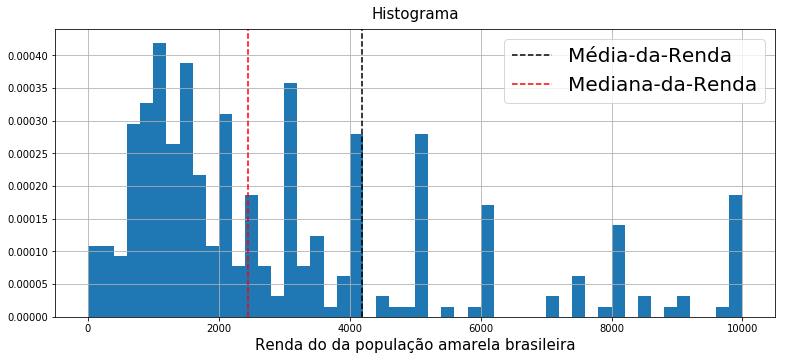

In [77]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_amarela['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda do da população amarela brasileira', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_amarela, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_amarela, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

fig.savefig('../Dados/imagens/histograma_renda_amarela.png', bbox_inches='tight')

## BoxPlot 

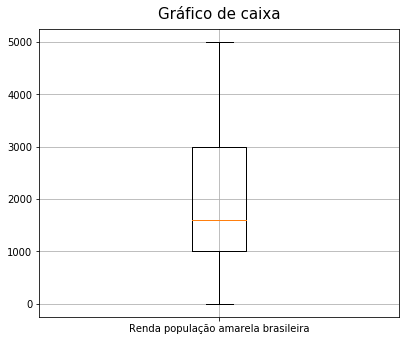

In [78]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_amarela_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população amarela brasileira'])
eixo.grid(True)

fig.savefig('../Dados/imagens/boxplot_renda_amarela.png', bbox_inches='tight')

# Cálculo estatístico da população masculina brasileira

In [79]:
df_masculino = df[df['Sexo'] == 'Masculino']
df_masculino.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,12,800,1.603808
3,Rondônia,Masculino,46,Branca,6,3500,1.783158
6,Rondônia,Masculino,57,Parda,12,3150,1.570078
9,Rondônia,Masculino,26,Parda,12,1150,1.793203
13,Rondônia,Masculino,38,Parda,12,2000,1.750827


In [80]:
filtro_masculino = df_masculino[df_masculino['Renda'] <= 10000] 
filtro_masculino_bp = df_masculino[df_masculino['Renda'] <= 5000] 

In [81]:
renda_media_masculino = df_masculino['Renda'].mean()
renda_media_masculino

2192.4415962441312

In [82]:
renda_mediana_masculino = df_masculino['Renda'].median()
renda_mediana_masculino

1350.0

In [83]:
q1,_,q3 = df_masculino['Renda'].quantile([0.25,0.5,0.75])

In [84]:
print('{:.2f} % da população masculina brasileira vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_masculino,q1,q3) *100, q1,q3))

75.80 % da população masculina brasileira vive com um salario entre R$800.00 e R$2300.00


In [85]:
maximo_masculino = df_masculino['Renda'].max()
maximo_masculino

200000

In [86]:
minimo_masculino = df_masculino['Renda'].min()
minimo_masculino

0

## Exportando dados csv

In [87]:
df_masculino_tratado = df_masculino.drop(['Cor','Altura'], axis=1)
df_masculino_tratado.to_csv('../Dados/dados_masculino.csv',index=False)

## Histograma

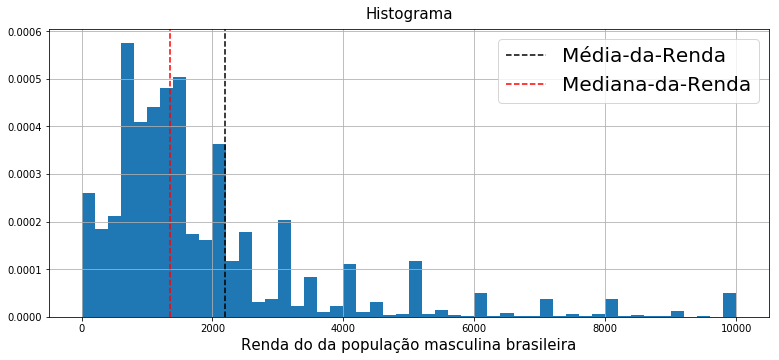

In [88]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_masculino['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda do da população masculina brasileira', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_masculino, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_masculino, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

fig.savefig('../Dados/imagens/histograma_renda_masculino.png', bbox_inches='tight')

## Boxplot

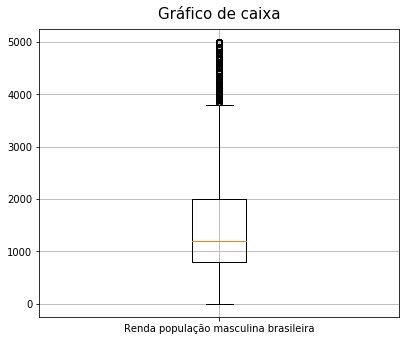

In [89]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_masculino_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população masculina brasileira'])
eixo.grid(True)

fig.savefig('../Dados/imagens/boxplot_renda_masculino.png', bbox_inches='tight')

# Cálculo estatístico da população feminina brasileira 

In [90]:
df_feminino = df[df['Sexo'] == 'Feminino']
df_feminino.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
1,Rondônia,Feminino,23,Branca,12,1150,1.739790
2,Rondônia,Feminino,35,Parda,15,880,1.760444
4,Rondônia,Feminino,47,Parda,9,150,1.690631
5,Rondônia,Feminino,34,Parda,12,790,1.637906
7,Rondônia,Feminino,60,Parda,12,1700,1.608495


In [91]:
filtro_feminino = df_feminino[df_feminino['Renda'] <= 10000]
filtro_feminino_bp = df_feminino[df_feminino['Renda'] <= 5000]

In [92]:
renda_media_feminino = df_feminino['Renda'].mean()
renda_media_feminino

1566.84739296312

In [93]:
renda_mediana_feminino = df_feminino['Renda'].median()
renda_mediana_feminino

900.0

In [94]:
q1,_,q3 = df_feminino['Renda'].quantile([0.25,0.5,0.75])

In [124]:
print('{:.2f} % da população feminina vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_feminino,q1,q3) *100, q1,q3))

75.06 % da população feminina vive com um salario entre R$700.00 e R$1500.00


In [96]:
variancia_feminino = df_feminino['Renda'].var()
variancia_feminino

6608310.386392425

In [97]:
maximo_feminino = df_feminino['Renda'].max()
maximo_feminino

120000

In [98]:
minimo_feminino = df_feminino['Renda'].min()
minimo_feminino

0

## Exportando dados csv 

In [99]:
df_feminino_tratado = df_feminino.drop(['Cor','Altura'], axis=1)
df_feminino_tratado.to_csv('../Dados/dados_feminio.csv',index=False)

## Histograma

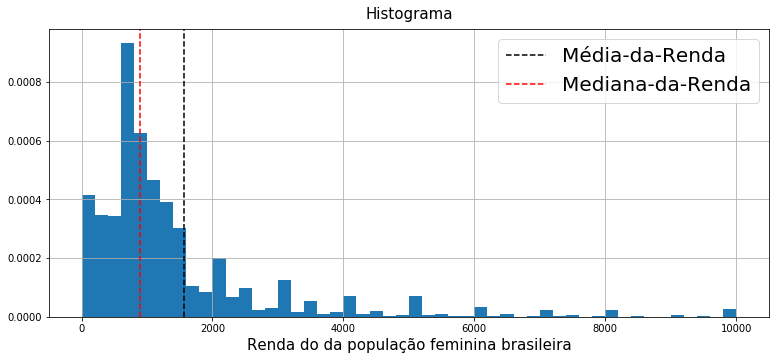

In [100]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_feminino['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda do da população feminina brasileira', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_feminino, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_feminino, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

fig.savefig('../Dados/imagens/histograma_renda_feminino.png', bbox_inches='tight')

## BoxPlot 

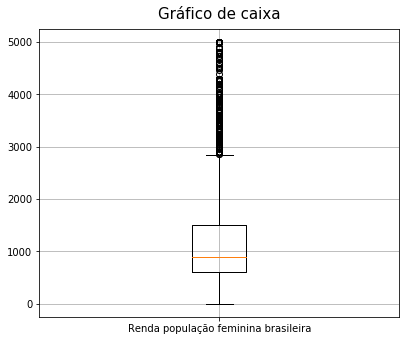

In [101]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_feminino_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população feminina brasileira'])
eixo.grid(True)

fig.savefig('../Dados/imagens/boxPlot_renda_feminino.png', bbox_inches='tight')

# Comparações por numero de população

In [102]:
df_cor = df[['Cor']]
df_cor.head()

,Cor
0,Parda
1,Branca
2,Parda
3,Branca
4,Parda


In [103]:
df_cor.drop_duplicates(inplace=True)

C:\Users\henri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
df_cor

,Cor
0,Parda
1,Branca
8,Preta
35,Amarela
659,Indigena


In [105]:
df_cor.index

Int64Index([0, 1, 8, 35, 659], dtype='int64')

In [106]:
df_cor.shape[0]

5

In [107]:
range(df_cor.shape[0])

range(0, 5)

In [108]:
for i in range(df_cor.shape[0]):
    print(i)

0
1
2
3
4


In [109]:
df_cor.index = range(df_cor.shape[0])

In [110]:
df_cor

,Cor
0,Parda
1,Branca
2,Preta
3,Amarela
4,Indigena


In [111]:
n_pardos = df_pardos.shape[0]
n_brancos = df_brancos.shape[0]
n_preta = df_preta.shape[0]
n_amarela = df_amarela.shape[0]
n_indigena = df_indigena.shape[0]

In [112]:
t = [n_pardos,n_brancos,n_preta,n_amarela,n_indigena]

In [113]:
df_cor['Populacao'] = t

C:\Users\henri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
df_cor

,Cor,Populacao
0,Parda,35925
1,Branca,31815
2,Preta,8391
3,Amarela,352
4,Indigena,357


In [115]:
n_amarela

352

In [116]:
df_cor['Populacao'].sum()

76840

In [117]:
df.shape[0]

76840

In [118]:
populacao = df['Cor'].value_counts()

In [119]:
populacao

Parda       35925
Branca      31815
Preta        8391
Indigena      357
Amarela       352
Name: Cor, dtype: int64

In [120]:
df_cor2 = pd.DataFrame(df['Cor'].value_counts())

In [121]:
df_cor2

,Cor
Parda,35925
Branca,31815
Preta,8391
Indigena,357
Amarela,352


# Comparando BoxPlots por Cor 

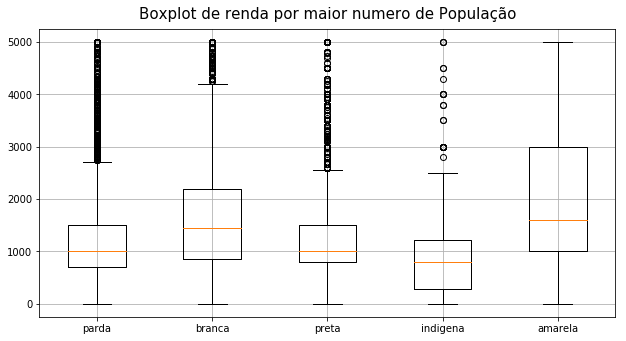

In [122]:
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot([filtro_pardos_bp['Renda'],filtro_branco_bp['Renda'],
             filtro_preta_bp['Renda'],filtro_indigena_bp['Renda'],
             filtro_amarela_bp['Renda']])
eixo.set_title('Boxplot de renda por maior numero de População', fontsize=15, pad=10)
eixo.set_xticklabels(['parda','branca','preta','indigena', 'amarela'])
eixo.grid(True)

fig.savefig('../Dados/imagens/boxplot_renda_cor.png', bbox_inches='tight')

# Comparando BoxPlot por Sexo 

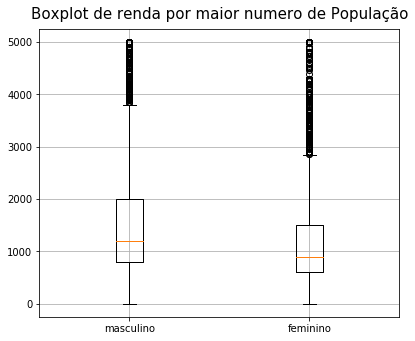

In [123]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot([filtro_masculino_bp['Renda'],filtro_feminino_bp['Renda']])
eixo.set_title('Boxplot de renda por maior numero de População', fontsize=15, pad=10)
eixo.set_xticklabels(['masculino','feminino'])
eixo.grid(True)

fig.savefig('../Dados/imagens/boxplot_renda_sexo.png', bbox_inches='tight')

# Conclusão

    Foi utilizado um banco de dados em csv retirado do site do IBGE e tratado pelo curso de estatística da plataforma alura. Esse banco tem os respectivos dados: UF,Sexo, Cor, Anos de Estudo, Idade, Renda e Altura. A coleta de dados foi feita por entrevista. Um detalhe nesse banco é que somente foram coletados os dados dos responsáveis pela residência. Ou seja, o indivíduo que provém o sustento da família. Nesse estudo eu fiz uma distinção por cor e por sexo dentro desses dados. Existem um erros na autodeclaração por cor, uma vez que o brasil é um país miscigenado e existe um racismo estruturado na nossa cultura. Sendo assim uma parcela do espectro das cores ( bracos, pretos e pardos) não são bem definidos em um determinado nível econômico.
    
    No começo do estudo eu fiz um histograma da renda de todos os brasilerios. E visualmente se nota uma Assimetria à direita,pois a média está à direita da mediana. Logo não se pode afirmar que essa distribuição seja uma distribuição normal. Ou seja, existe uma maior concetração de população concentrada nos valores menores de renda. Só com visualização desse gráfico pode se dizer que exite uma desigualdade sócial.E sabe-se que 76.10 % da população brasileira vive com um salario entre R$788.00 e R$2000.00. 
    
    A desigualdade no Brasil se divide em inumeras outras desigualdades. Para entende-lás o IBGE separou a população brasileria em alguns grupos étnicos. O primeiro grupo a ser análisado é os pardos. Basicamente são os mescigenados entre varias etnias. É o grupo mais populoso e 75.26 % da população parda vive com um salario entre R$750.00 e R$1600.00.
    
    A segunda população mais numerosa no país é a branca. Porém não se pode confiar muito nesse dado.  Uma vez que existe o racismo estruturado na nossa cultura. Como os dados são autodeclarados e de se acreditar que exista um numero ainda maior de pardos e uma quantidade ainda menor de brancos. Enfim, nesse banco de dados, 78.93 % da população branca vive com um salario entre R$908.00 e R$3000.00. Logo demonstra uma desigualdade entre a população branca e a parda. Porém essa desilgualdade pode ser ainda maior. 
    
    Os negros vêm em seguida em numero populacional. Ao análisar esses dados, deve-se tomar um cuidado, pois, sabendo que existe um racismo estruturalizado na nossa sociedade, pode ocorrer viesses negátivos com esses dados. Sabendo disso a análise do histograma de venda visualmente parece ser mais desigual e mais assimetrica à direita com 76.38 % da população preta vivem com um salario entre R$788.00 e R$1600.00.
    
    Os indigenas e os asiaticos estão em menor numero populacional. E podemos ver uma grande diferença de renda entre eles. Cerca de 78.12 % da população amarela vive com um salario entre R$1200.00 e R$5000.00 e 76.19 % da população indigena vive com um salario entre R$300.00 e R$1400.00. Nota-se que os indigenas são os mais pobres.Os Asiáticos são os mais ricos e de menor numero populacional. Isso se deve a consequências históricas e politicas.
    
    A última compareção feita foi entre a população feminina e masculina.  O que demostrou uma desigualdade entre generos bem notável. Afinal, 75.06 % da população feminina vive com um salario entre R$700.00 e R$1500.00 e 75.80 % da população masculina brasileira vive com um salario entre R$800.00 e R$2300.00. Logo, esses dados mostra que a desigualdade de genero é uma realidade no Brasil.
    
     
    